## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
from keras.datasets import cifar10
train, test = keras.datasets.cifar10.load_data()

In [12]:
# 將 X 與 Y 獨立放進變數
from keras.utils import np_utils
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)
#y_train =  np_utils.to_categorical(y_train, num_classes)
#y_test =  np_utils.to_categorical(y_test, num_classes)

In [13]:

# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
model = build_mlp()
import tensorflow as tf 
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\1_220107_Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
"""
設定要訓練的 Epoch 數
"""

# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/10
196/196 [==============================] - 7s 32ms/step - loss: 1.9233 - accuracy: 0.3030 - val_loss: 1.8132 - val_accuracy: 0.3516
Epoch 2/10
196/196 [==============================] - 6s 30ms/step - loss: 1.7156 - accuracy: 0.3834 - val_loss: 1.6445 - val_accuracy: 0.4177
Epoch 3/10
196/196 [==============================] - 6s 29ms/step - loss: 1.6294 - accuracy: 0.4188 - val_loss: 1.6423 - val_accuracy: 0.4188
Epoch 4/10
196/196 [==============================] - 6s 30ms/step - loss: 1.5588 - accuracy: 0.4443 - val_loss: 1.5456 - val_accuracy: 0.4524
Epoch 5/10
196/196 [==============================] - 6s 28ms/step - loss: 1.5082 - accuracy: 0.4627 - val_loss: 1.5578 - val_accuracy: 0.4456
Epoch 6/10
196/196 [==============================] - 6s 28ms/step - loss: 1.4793 - accuracy: 0.4719 - val_loss: 1.4810 - val_accuracy: 0.4692
Epoch 7/10
196/196 [==============================] - 6s 28ms/step - loss: 1.4325 - accuracy: 0.4909 - val_loss: 1.4843 - val_accuracy: 0.4638

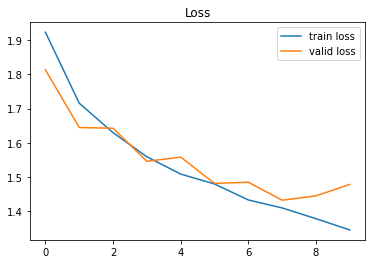

NameError: name 'train_acc' is not defined

In [31]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

#train_acc = model.history.history["acc"]
#train_acc = model.history.history["acc"]
#valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()